In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

tf.test.is_gpu_available()

2.0.0-dev20191002
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0-dev20191002
tensorflow_core.keras 2.2.4-tf
Instructions for updating:
Use `tf.config.experimental.list_physical_devices('GPU')` instead.


False

In [2]:
# 在打开网址时出现和ssl证书相关的问题时，需要加上这句话
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# 采用房屋预测模型数据
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(
    housing.data,housing.target,random_state = 7)
x_train,x_valid,y_train,y_valid = train_test_split(
    x_train_all,y_train_all,random_state = 11)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
# 进行数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [6]:
# 我们要搜索的参数假设只有learning_rate：[1e-4,3e-4,1e-3,1e-2,3e-2]
# W = W + grad * learning_rate
# 定义learning_rate的集合
learing_rates = [1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
historys = [] # 保存所有的history
for lr in learing_rates:
    # 定义一个简单的模型
    model = keras.models.Sequential([
        keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
        keras.layers.Dense(1)
    ])

    optimizer = keras.optimizers.SGD(lr)
    # 这个房价预测问题属于回归问题，使用的mse均方根误差损失函数
    model.compile(loss="mean_squared_error", 
              optimizer = optimizer)
    
    callbacks = [
        keras.callbacks.EarlyStopping(min_delta=1e-2,patience=5)
    ]

    # 开始训练:使用归一化的数据
    history = model.fit(x_train_scaled,y_train,epochs=10,
          validation_data=(x_valid_scaled,y_valid),
          callbacks=callbacks)
    historys.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 63us/sample - loss: 4.4474 - val_loss: 3.8234
Epoch 2/10
11610/11610 [==============================] - 0s 29us/sample - loss: 3.1364 - val_loss: 2.7906
Epoch 3/10
11610/11610 [==============================] - 0s 28us/sample - loss: 2.3317 - val_loss: 2.1379
Epoch 4/10
11610/11610 [==============================] - 0s 30us/sample - loss: 1.8153 - val_loss: 1.7075
Epoch 5/10
11610/11610 [==============================] - 0s 30us/sample - loss: 1.4746 - val_loss: 1.4200
Epoch 6/10
11610/11610 [==============================] - 0s 30us/sample - loss: 1.2467 - val_loss: 1.2254
Epoch 7/10
11610/11610 [==============================] - 0s 27us/sample - loss: 1.0912 - val_loss: 1.0907
Epoch 8/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.9836 - val_loss: 0.9969
Epoch 9/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.9082 - val_l

当前的learing_rate为: 0.0001


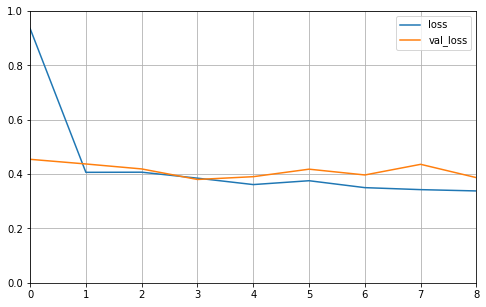

当前的learing_rate为: 0.0003


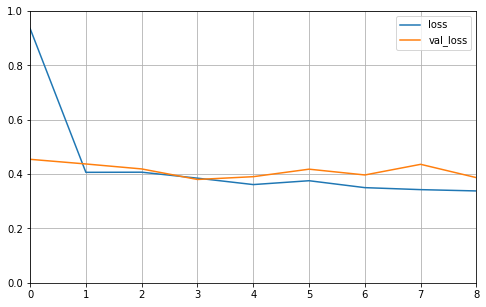

当前的learing_rate为: 0.001


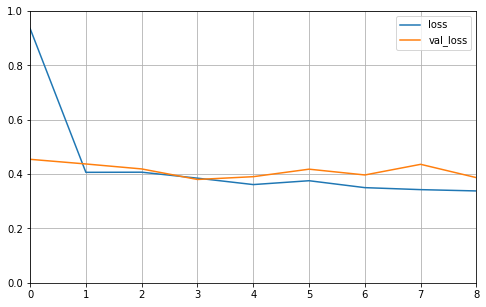

当前的learing_rate为: 0.003


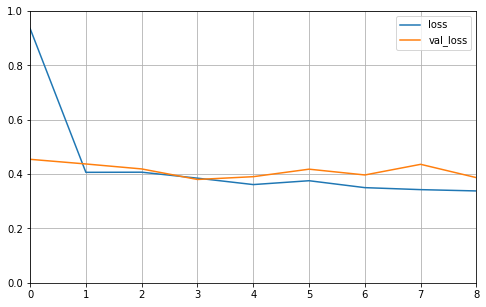

当前的learing_rate为: 0.01


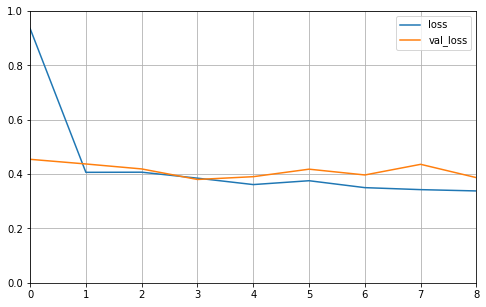

当前的learing_rate为: 0.03


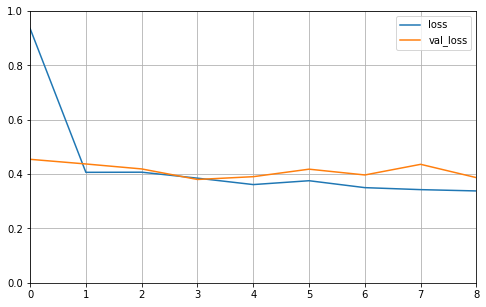

In [7]:
# 把值的变化过程打印出来
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

for learing_rate ,histtory in zip(learing_rates,historys):
    print("当前的learing_rate为:",learing_rate)
    plot_learning_curves(history)

In [8]:
# model.evaluate(x_test_scaled,y_test)